In [ ]:
!pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
df = pd.read_csv("df.csv")

In [ ]:
df

,time_stamp,Luas Panen Padi,GKP Tingkat Petani,GKP Tingkat Penggilingan,GKG Tingkat Penggilingan,Beras Medium Penggilingan,Beras Premium Penggilingan,Jagung Pipilan Kering,Kedelai Biji Kering (Lokal),Bawang Merah,Cabai Merah Keriting,Cabai Rawit Merah,Sapi (Hidup),Ayam Ras Pedaging (Hidup),Telur Ayam Ras,Stok GKG Tingkat Penggilingan,Stok Beras Tingkat Penggilingan
0,01/06/2021,70,4.640,4.920,5.150,9.530,10.360,4.290,-,22.610,16.960,-,49.220,-,-,540,190
1,02/06/2021,70,4.520,4.870,5.210,9.330,10.210,4.320,-,19.920,15.000,-,49.440,-,-,370,190
2,03/06/2021,70,4.640,4.860,5.220,9.400,10.330,4.000,-,19.650,15.390,-,50.560,-,-,670,190
3,04/06/2021,80,4.640,5.000,5.280,9.470,10.290,4.120,-,19.650,14.360,-,49.990,-,-,450,160
4,05/06/2021,80,4.640,4.960,5.340,9.550,10.240,4.240,-,16.810,12.200,-,49.600,-,-,510,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24679,22/06/2024,0,5.300,5.650,5.800,10.000,11.250,3.800,-,-,NaN,NaN,-,NaN,NaN,50,10
24680,23/06/2024,0,5.300,5.650,5.800,10.000,11.250,3.800,-,-,NaN,NaN,-,NaN,NaN,50,10
24681,24/06/2024,0,5.250,5.650,5.800,10.630,11.160,3.380,-,-,NaN,NaN,-,NaN,NaN,50,10
24682,25/06/2024,-,5.300,5.650,5.800,10.000,11.160,3.800,-,-,NaN,NaN,-,NaN,NaN,50,150


In [ ]:
df.dtypes

time_stamp                         object
Luas Panen Padi                    object
GKP Tingkat Petani                 object
GKP Tingkat Penggilingan           object
GKG Tingkat Penggilingan           object
Beras Medium Penggilingan          object
Beras Premium Penggilingan         object
Jagung Pipilan Kering              object
Kedelai Biji Kering (Lokal)        object
Bawang Merah                       object
Cabai Merah Keriting               object
Cabai Rawit Merah                  object
Sapi (Hidup)                       object
Ayam Ras Pedaging (Hidup)          object
Telur Ayam Ras                     object
Stok GKG Tingkat Penggilingan      object
Stok Beras Tingkat Penggilingan    object
dtype: object

In [ ]:
df['time_stamp'] = pd.to_datetime(df['time_stamp'], format='%d/%m/%Y', dayfirst=True)

In [ ]:
columns_to_convert = [
    'Luas Panen Padi', 'GKP Tingkat Petani', 'GKP Tingkat Penggilingan',
    'GKG Tingkat Penggilingan', 'Beras Medium Penggilingan',
    'Beras Premium Penggilingan', 'Jagung Pipilan Kering',
    'Kedelai Biji Kering (Lokal)', 'Bawang Merah', 'Cabai Merah Keriting',
    'Cabai Rawit Merah', 'Sapi (Hidup)', 'Ayam Ras Pedaging (Hidup)',
    'Telur Ayam Ras', 'Stok GKG Tingkat Penggilingan',
    'Stok Beras Tingkat Penggilingan'
]

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [ ]:
df.dtypes

time_stamp                         datetime64[ns]
Luas Panen Padi                           float64
GKP Tingkat Petani                        float64
GKP Tingkat Penggilingan                  float64
GKG Tingkat Penggilingan                  float64
Beras Medium Penggilingan                 float64
Beras Premium Penggilingan                float64
Jagung Pipilan Kering                     float64
Kedelai Biji Kering (Lokal)               float64
Bawang Merah                              float64
Cabai Merah Keriting                      float64
Cabai Rawit Merah                         float64
Sapi (Hidup)                              float64
Ayam Ras Pedaging (Hidup)                 float64
Telur Ayam Ras                            float64
Stok GKG Tingkat Penggilingan             float64
Stok Beras Tingkat Penggilingan           float64
dtype: object

In [ ]:
missing_values = df.isnull().sum()
print("Nilai yang hilang sebelum diisi:\n", missing_values)

Nilai yang hilang sebelum diisi:
 time_stamp                             0
Luas Panen Padi                     5178
GKP Tingkat Petani                  5551
GKP Tingkat Penggilingan            5055
GKG Tingkat Penggilingan            4686
Beras Medium Penggilingan           3061
Beras Premium Penggilingan          4825
Jagung Pipilan Kering               6637
Kedelai Biji Kering (Lokal)        17511
Bawang Merah                       11833
Cabai Merah Keriting                9338
Cabai Rawit Merah                  10790
Sapi (Hidup)                        7320
Ayam Ras Pedaging (Hidup)           9545
Telur Ayam Ras                      8787
Stok GKG Tingkat Penggilingan       3496
Stok Beras Tingkat Penggilingan     3474
dtype: int64


In [ ]:
df.fillna(df.mean(), inplace=True)
df.replace(0, np.nan)

,time_stamp,Luas Panen Padi,GKP Tingkat Petani,GKP Tingkat Penggilingan,GKG Tingkat Penggilingan,Beras Medium Penggilingan,Beras Premium Penggilingan,Jagung Pipilan Kering,Kedelai Biji Kering (Lokal),Bawang Merah,Cabai Merah Keriting,Cabai Rawit Merah,Sapi (Hidup),Ayam Ras Pedaging (Hidup),Telur Ayam Ras,Stok GKG Tingkat Penggilingan,Stok Beras Tingkat Penggilingan
0,2021-06-01,70.000000,4.64,4.92,5.15,9.53,10.36,4.29,9.522051,22.610000,16.960000,34.277097,49.22000,22.677894,23.152489,540.0,190.0
1,2021-06-02,70.000000,4.52,4.87,5.21,9.33,10.21,4.32,9.522051,19.920000,15.000000,34.277097,49.44000,22.677894,23.152489,370.0,190.0
2,2021-06-03,70.000000,4.64,4.86,5.22,9.40,10.33,4.00,9.522051,19.650000,15.390000,34.277097,50.56000,22.677894,23.152489,670.0,190.0
3,2021-06-04,80.000000,4.64,5.00,5.28,9.47,10.29,4.12,9.522051,19.650000,14.360000,34.277097,49.99000,22.677894,23.152489,450.0,160.0
4,2021-06-05,80.000000,4.64,4.96,5.34,9.55,10.24,4.24,9.522051,16.810000,12.200000,34.277097,49.60000,22.677894,23.152489,510.0,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24679,2024-06-22,NaN,5.30,5.65,5.80,10.00,11.25,3.80,9.522051,20.277105,28.686761,34.277097,51.48565,22.677894,23.152489,50.0,10.0
24680,2024-06-23,NaN,5.30,5.65,5.80,10.00,11.25,3.80,9.522051,20.277105,28.686761,34.277097,51.48565,22.677894,23.152489,50.0,10.0
24681,2024-06-24,NaN,5.25,5.65,5.80,10.63,11.16,3.38,9.522051,20.277105,28.686761,34.277097,51.48565,22.677894,23.152489,50.0,10.0
24682,2024-06-25,37.251615,5.30,5.65,5.80,10.00,11.16,3.80,9.522051,20.277105,28.686761,34.277097,51.48565,22.677894,23.152489,50.0,150.0


In [ ]:
df.head()

,time_stamp,Luas Panen Padi,GKP Tingkat Petani,GKP Tingkat Penggilingan,GKG Tingkat Penggilingan,Beras Medium Penggilingan,Beras Premium Penggilingan,Jagung Pipilan Kering,Kedelai Biji Kering (Lokal),Bawang Merah,Cabai Merah Keriting,Cabai Rawit Merah,Sapi (Hidup),Ayam Ras Pedaging (Hidup),Telur Ayam Ras,Stok GKG Tingkat Penggilingan,Stok Beras Tingkat Penggilingan
0,2021-06-01,70.0,4.64,4.92,5.15,9.53,10.36,4.29,9.522051,22.61,16.96,34.277097,49.22,22.677894,23.152489,540.0,190.0
1,2021-06-02,70.0,4.52,4.87,5.21,9.33,10.21,4.32,9.522051,19.92,15.00,34.277097,49.44,22.677894,23.152489,370.0,190.0
2,2021-06-03,70.0,4.64,4.86,5.22,9.40,10.33,4.00,9.522051,19.65,15.39,34.277097,50.56,22.677894,23.152489,670.0,190.0
3,2021-06-04,80.0,4.64,5.00,5.28,9.47,10.29,4.12,9.522051,19.65,14.36,34.277097,49.99,22.677894,23.152489,450.0,160.0
4,2021-06-05,80.0,4.64,4.96,5.34,9.55,10.24,4.24,9.522051,16.81,12.20,34.277097,49.60,22.677894,23.152489,510.0,180.0


In [ ]:
count_zeros = df[columns_to_convert].eq(0).sum()
print("Jumlah nilai 0 nya ada segini")
print(count_zeros)

Jumlah nilai 0 nya ada segini
Luas Panen Padi                    952
GKP Tingkat Petani                   0
GKP Tingkat Penggilingan             0
GKG Tingkat Penggilingan             0
Beras Medium Penggilingan            0
Beras Premium Penggilingan           0
Jagung Pipilan Kering                0
Kedelai Biji Kering (Lokal)          0
Bawang Merah                         0
Cabai Merah Keriting                 0
Cabai Rawit Merah                    0
Sapi (Hidup)                         0
Ayam Ras Pedaging (Hidup)            0
Telur Ayam Ras                       0
Stok GKG Tingkat Penggilingan        3
Stok Beras Tingkat Penggilingan    329
dtype: int64


#missing

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

time_stamp                         0
Luas Panen Padi                    0
GKP Tingkat Petani                 0
GKP Tingkat Penggilingan           0
GKG Tingkat Penggilingan           0
Beras Medium Penggilingan          0
Beras Premium Penggilingan         0
Jagung Pipilan Kering              0
Kedelai Biji Kering (Lokal)        0
Bawang Merah                       0
Cabai Merah Keriting               0
Cabai Rawit Merah                  0
Sapi (Hidup)                       0
Ayam Ras Pedaging (Hidup)          0
Telur Ayam Ras                     0
Stok GKG Tingkat Penggilingan      0
Stok Beras Tingkat Penggilingan    0
dtype: int64


In [ ]:
df.set_index('time_stamp', inplace=True)

In [ ]:
df.to_csv('df_cleaned.csv')

In [ ]:
variability = df[columns_to_convert].std()
print("Variability Data:")
print(variability)

Variability Data:
Luas Panen Padi                     23.791760
GKP Tingkat Petani                   0.843489
GKP Tingkat Penggilingan             0.881978
GKG Tingkat Penggilingan             0.922602
Beras Medium Penggilingan            1.516748
Beras Premium Penggilingan           1.613450
Jagung Pipilan Kering                0.702417
Kedelai Biji Kering (Lokal)          0.748041
Bawang Merah                         4.142876
Cabai Merah Keriting                10.610965
Cabai Rawit Merah                   11.499867
Sapi (Hidup)                         4.733501
Ayam Ras Pedaging (Hidup)            2.252918
Telur Ayam Ras                       2.452395
Stok GKG Tingkat Penggilingan      173.639786
Stok Beras Tingkat Penggilingan     68.556663
dtype: float64


In [ ]:
sufficient_variability_columns = variability[variability > 0].index

In [ ]:
df_log = np.log(df[sufficient_variability_columns] + 1)

In [ ]:
df_log_weekly = df_log.resample('W').mean()

In [ ]:
variability_log = df_log.std()
print("Variability Data after Log Transformation:")
print(variability_log)

Variability Data after Log Transformation:
Luas Panen Padi                    0.910078
GKP Tingkat Petani                 0.132678
GKP Tingkat Penggilingan           0.132653
GKG Tingkat Penggilingan           0.126820
Beras Medium Penggilingan          0.132152
Beras Premium Penggilingan         0.127741
Jagung Pipilan Kering              0.115355
Kedelai Biji Kering (Lokal)        0.072842
Bawang Merah                       0.190645
Cabai Merah Keriting               0.357311
Cabai Rawit Merah                  0.338883
Sapi (Hidup)                       0.087117
Ayam Ras Pedaging (Hidup)          0.094687
Telur Ayam Ras                     0.106137
Stok GKG Tingkat Penggilingan      1.155137
Stok Beras Tingkat Penggilingan    0.895493
dtype: float64


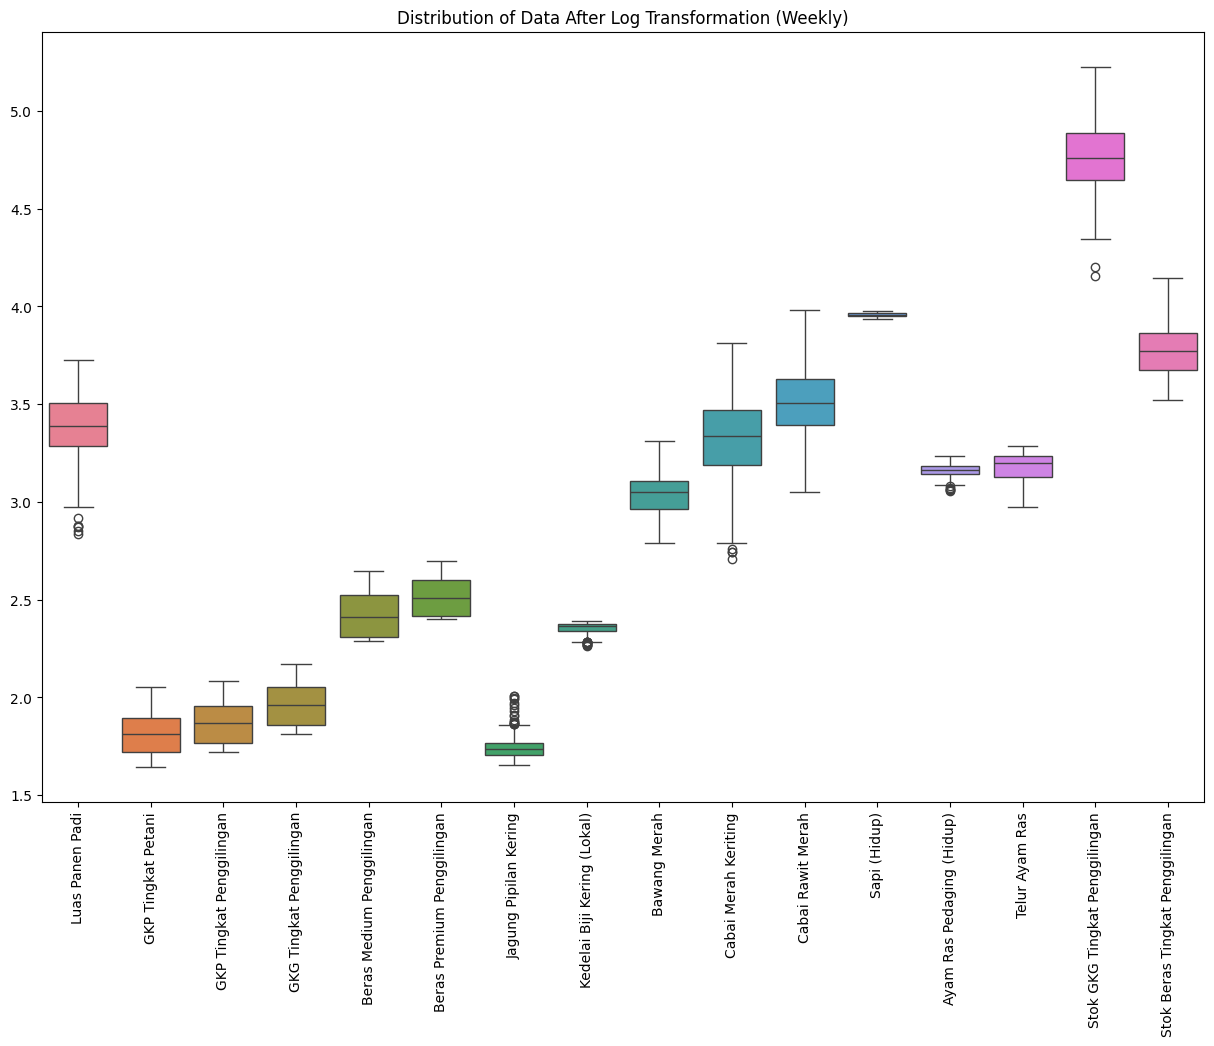

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_log_weekly)
plt.xticks(rotation=90)
plt.title('Distribution of Data After Log Transformation (Weekly)')
plt.show()


Prediction for Luas Panen Padi (Log Transformation, Weekly):



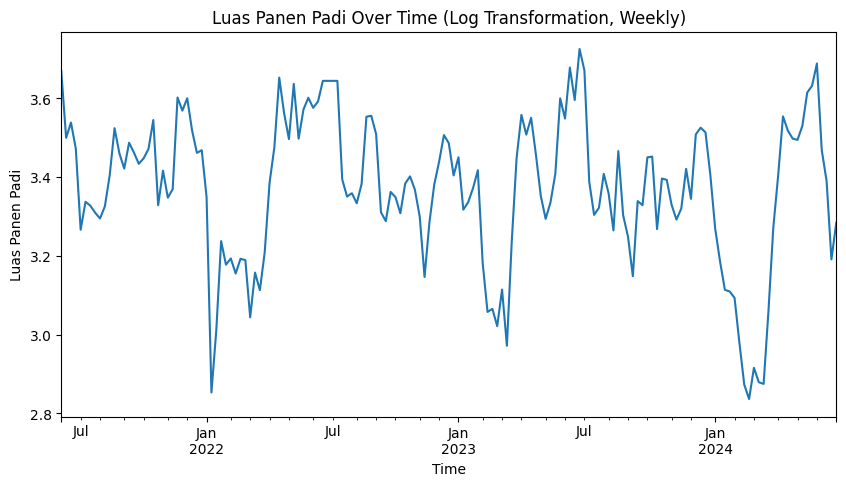


Prediction for GKP Tingkat Petani (Log Transformation, Weekly):



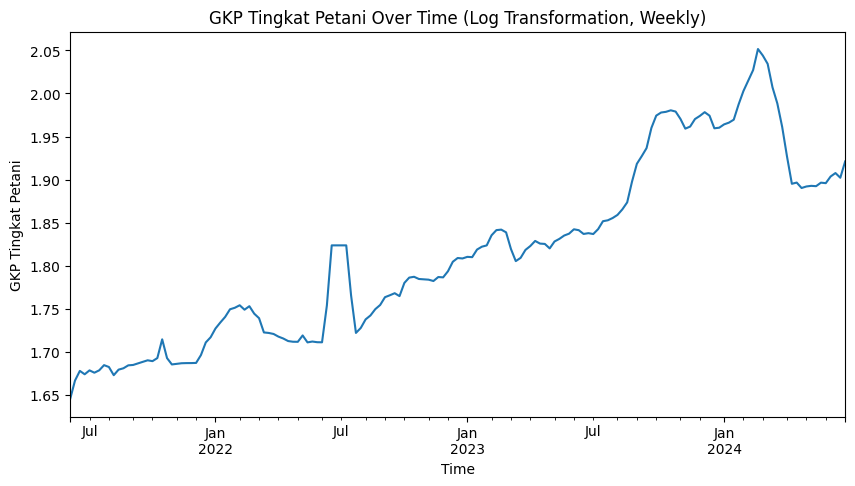


Prediction for GKP Tingkat Penggilingan (Log Transformation, Weekly):



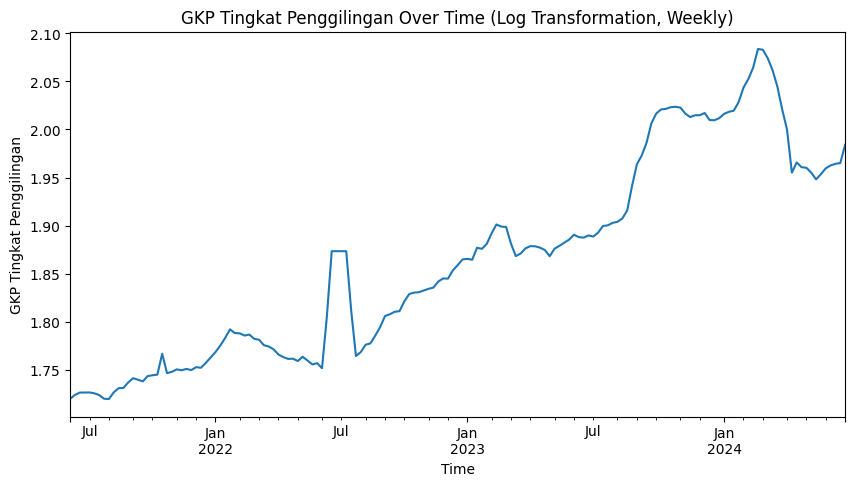


Prediction for GKG Tingkat Penggilingan (Log Transformation, Weekly):



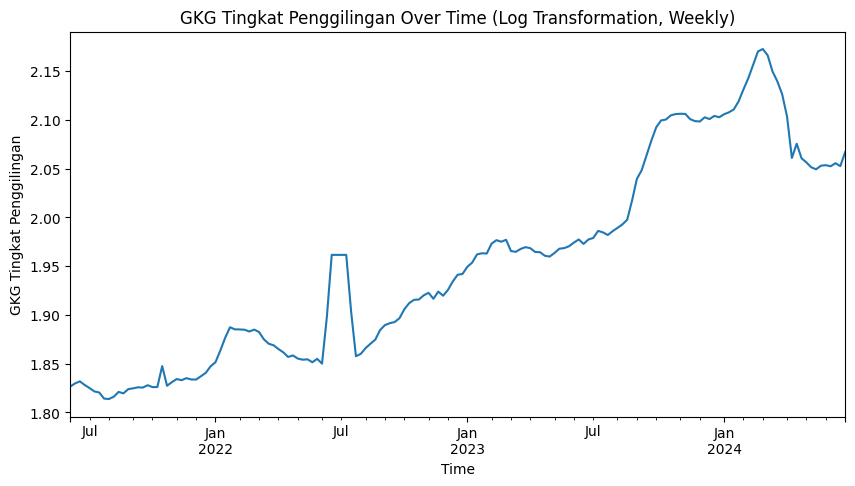


Prediction for Beras Medium Penggilingan (Log Transformation, Weekly):



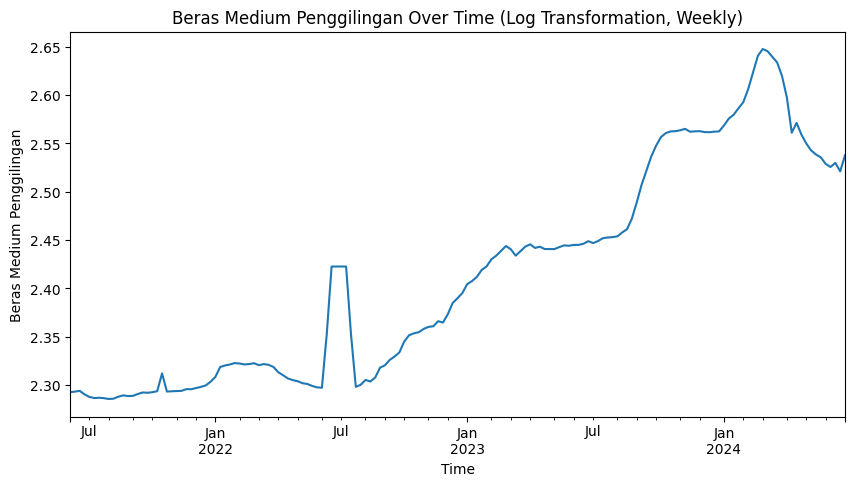


Prediction for Beras Premium Penggilingan (Log Transformation, Weekly):



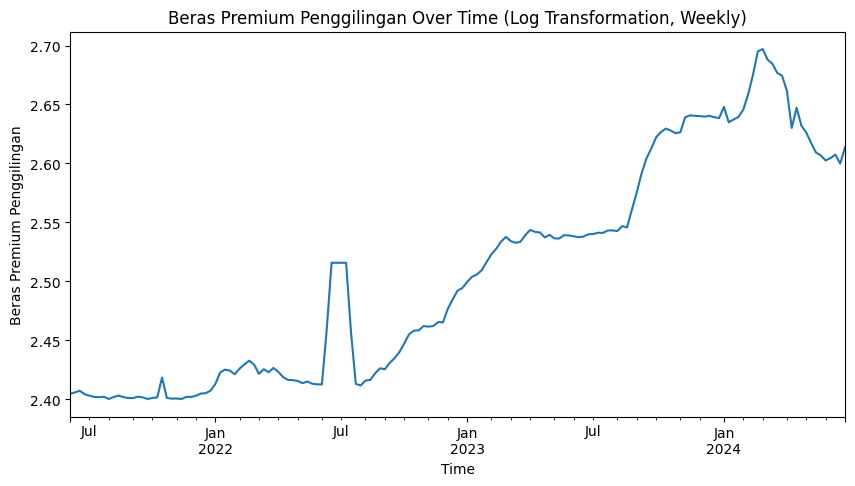


Prediction for Jagung Pipilan Kering (Log Transformation, Weekly):



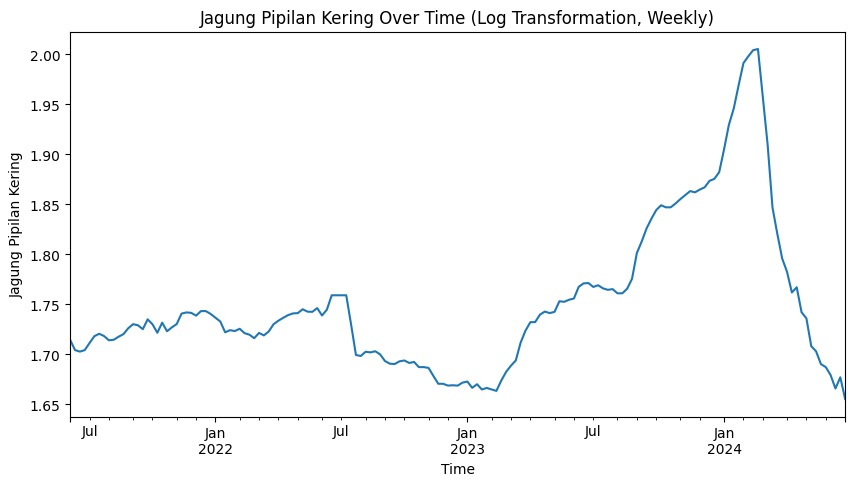


Prediction for Kedelai Biji Kering (Lokal) (Log Transformation, Weekly):



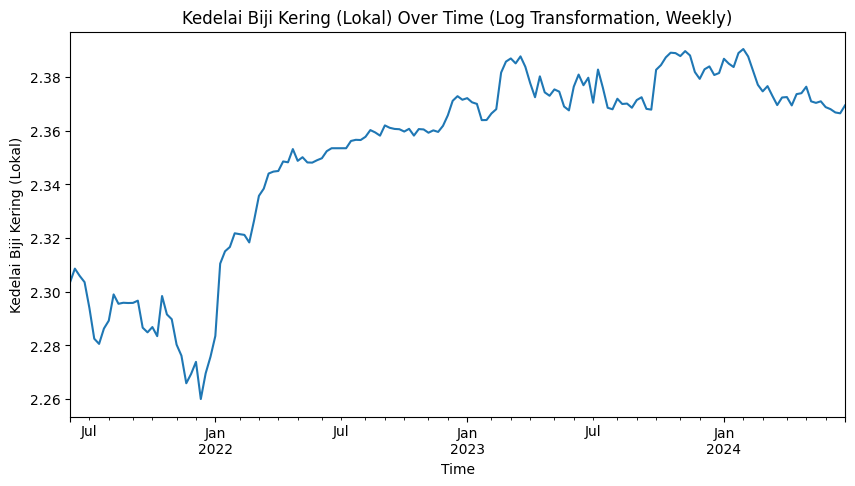


Prediction for Bawang Merah (Log Transformation, Weekly):



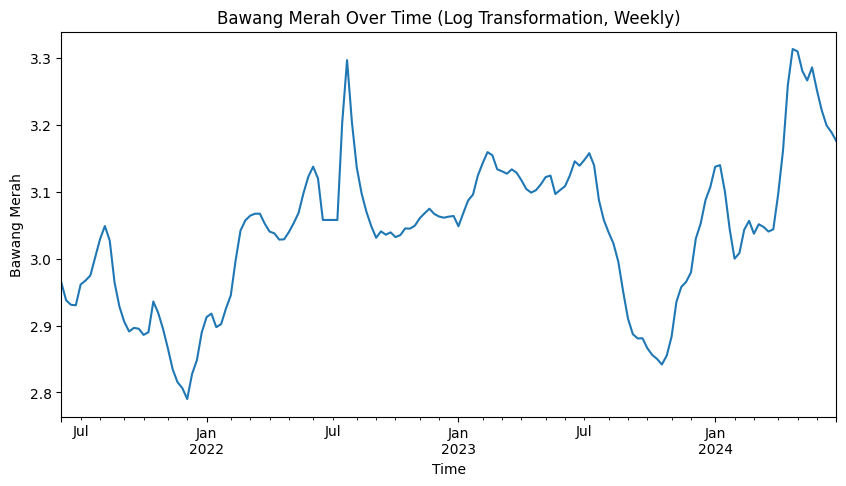


Prediction for Cabai Merah Keriting (Log Transformation, Weekly):



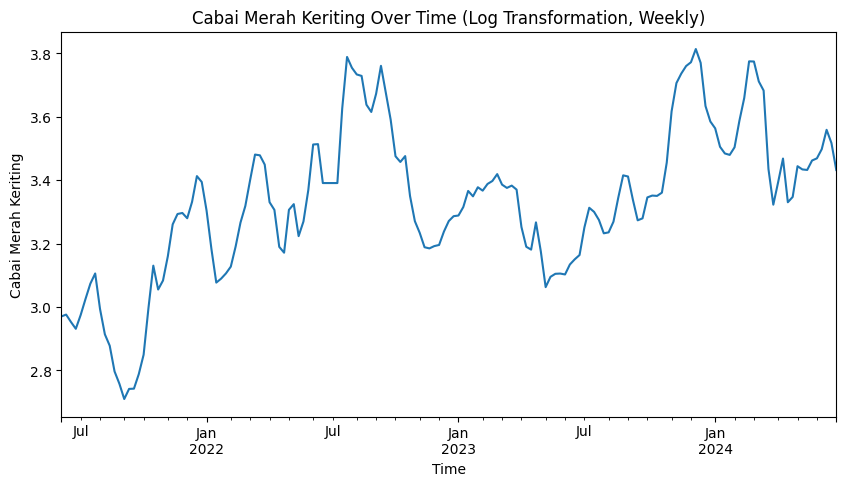


Prediction for Cabai Rawit Merah (Log Transformation, Weekly):



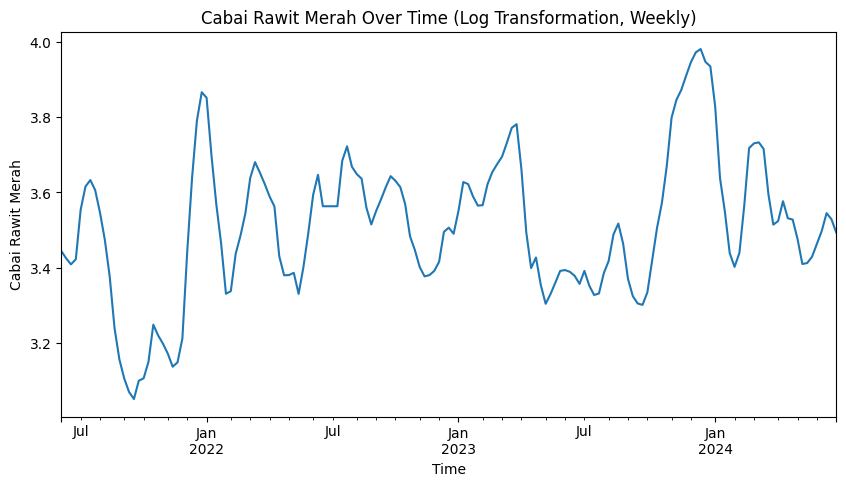


Prediction for Sapi (Hidup) (Log Transformation, Weekly):



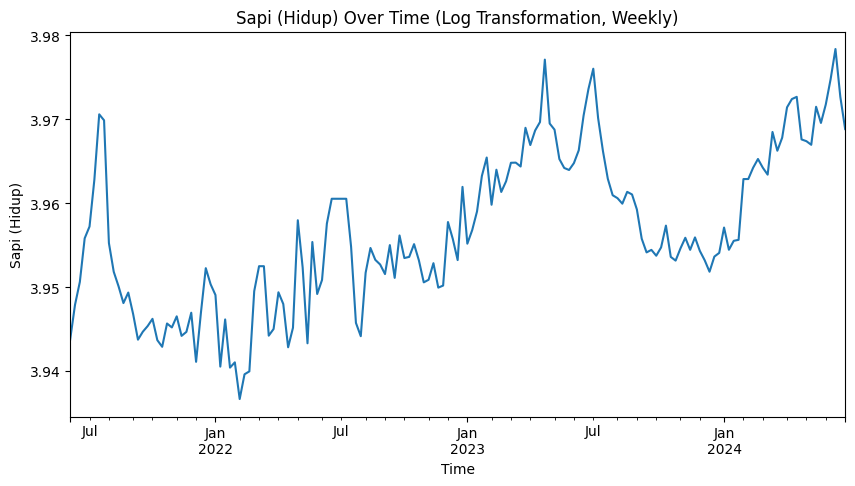


Prediction for Ayam Ras Pedaging (Hidup) (Log Transformation, Weekly):



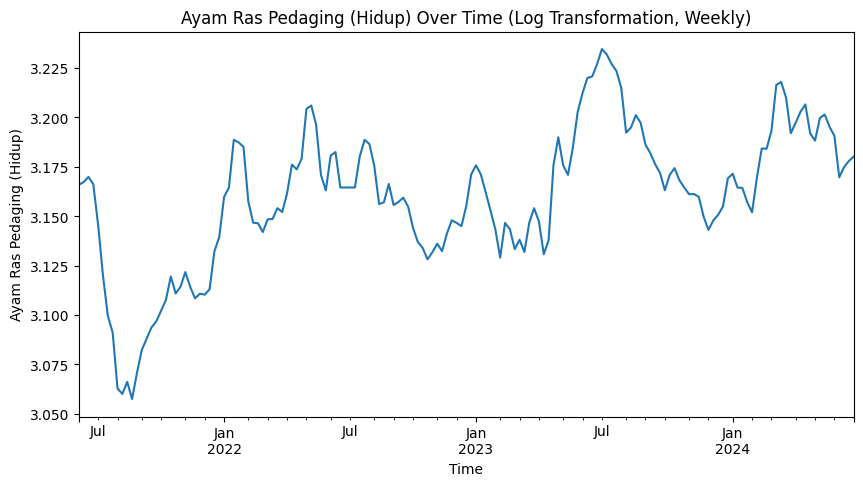


Prediction for Telur Ayam Ras (Log Transformation, Weekly):



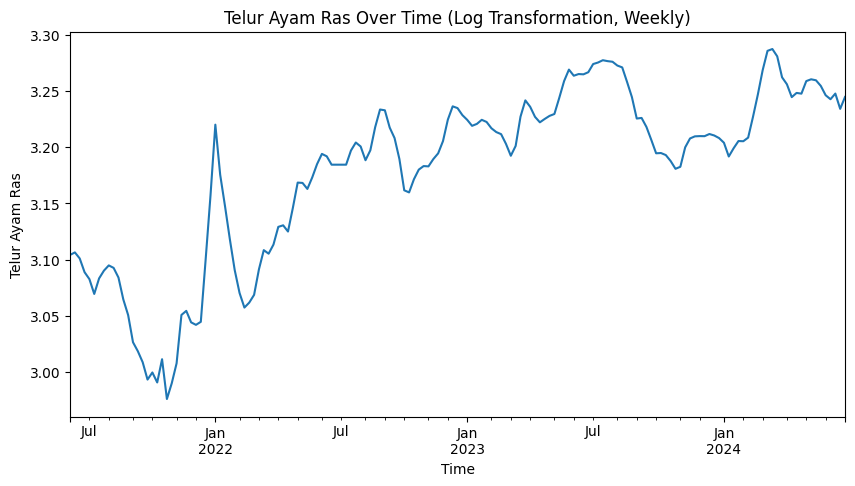


Prediction for Stok GKG Tingkat Penggilingan (Log Transformation, Weekly):



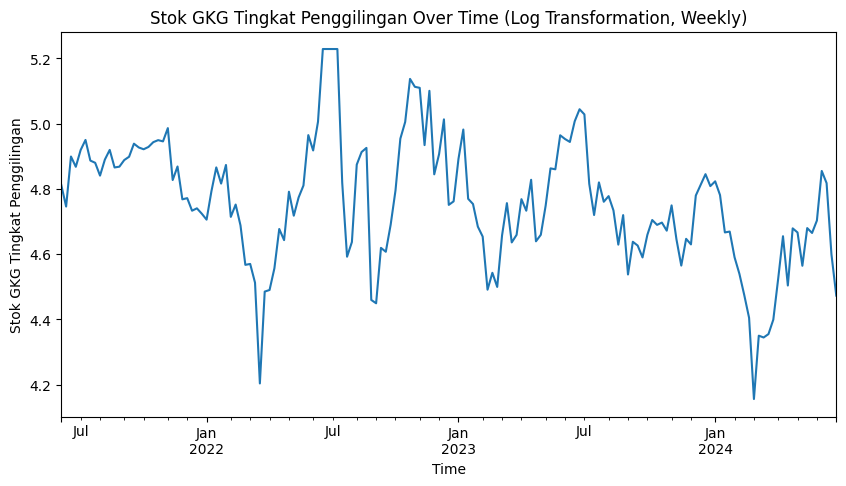


Prediction for Stok Beras Tingkat Penggilingan (Log Transformation, Weekly):



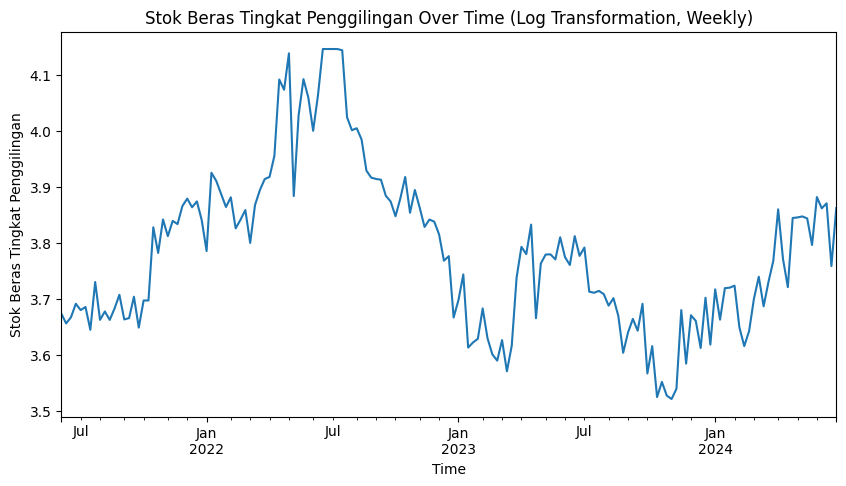

In [ ]:
for target_column in sufficient_variability_columns:
    print(f"\nPrediction for {target_column} (Log Transformation, Weekly):\n")

    plt.figure(figsize=(10, 5))
    df_log_weekly[target_column].plot()
    plt.title(f'{target_column} Over Time (Log Transformation, Weekly)')
    plt.xlabel('Time')
    plt.ylabel(target_column)
    plt.show()

In [ ]:
train = df_log_weekly[target_column][:-4]
test = df_log_weekly[target_column][-4:]

In [ ]:
print(f"Checking for NaN values in training data for {target_column}:")
print(train.isna().sum())

print(f"Checking for NaN values in test data for {target_column}:")
print(test.isna().sum())

Checking for NaN values in training data for Stok Beras Tingkat Penggilingan:
0
Checking for NaN values in test data for Stok Beras Tingkat Penggilingan:
0


In [ ]:
model = auto_arima(train, seasonal=False, trace=True, error_action='ignore', suppress_warnings=False)
model.fit(train)

Performing stepwise search to minimize aic


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-452.355, Time=1.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-437.106, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-456.240, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-457.335, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-439.026, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-455.707, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-455.710, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-453.712, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-459.145, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-457.528, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-457.532, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-458.098, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-455.833, Time=0.67 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 4.571 seconds


ARIMA(order=(0, 1, 1), scoring_args={}, with_intercept=False)

In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  157
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 231.572
Date:                Fri, 28 Jun 2024   AIC                           -459.145
Time:                        03:44:17   BIC                           -453.045
Sample:                    06-06-2021   HQIC                          -456.667
                         - 06-02-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3716      0.071     -5.264      0.000      -0.510      -0.233
sigma2         0.0030      0.000     11.230      0.000       0.002       0.004
Ljung-Box (L1) (Q):                   0.09   Jarque-

In [ ]:
forecast = model.predict(n_periods=4)

In [ ]:
forecast_index = pd.date_range(start=test.index[-1], periods=4, freq='W')
forecast = pd.Series(forecast, index=forecast_index)

In [ ]:
if forecast.isna().sum() > 0:
        print(f"Found NaN in forecast for {target_column}, replacing with previous values.")
        forecast.fillna(method='ffill', inplace=True)
        forecast.fillna(method='bfill', inplace=True)

print("Forecast for the next 4 weeks:")
print(forecast)

Found NaN in forecast for Stok Beras Tingkat Penggilingan, replacing with previous values.
Forecast for the next 4 weeks:
2024-06-30    3.85623
2024-07-07    3.85623
2024-07-14    3.85623
2024-07-21    3.85623
Freq: W-SUN, dtype: float64


In [ ]:
if forecast.isna().sum() > 0:
    print(f"Found NaN in forecast for {target_column}, replacing with previous values.")
    forecast.fillna(method='ffill', inplace=True)
    forecast.fillna(method='bfill', inplace=True)

    print("Forecast for the next 4 weeks:")
    print(forecast)

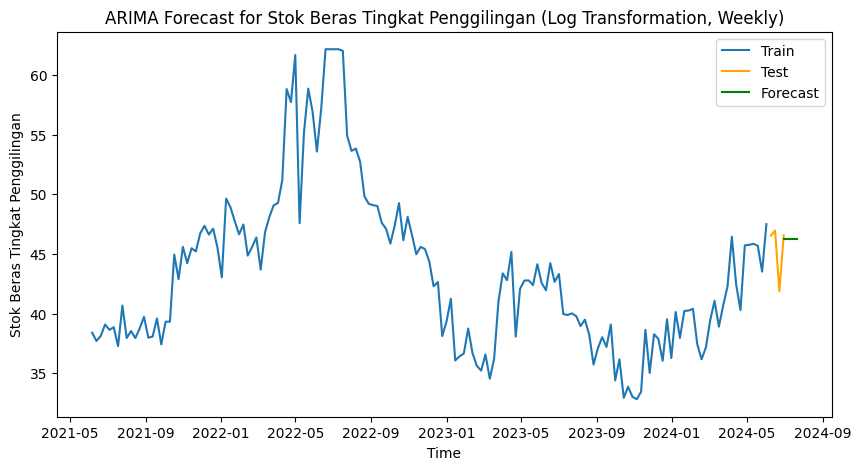

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train.index, np.exp(train) - 1, label='Train')
plt.plot(test.index, np.exp(test) - 1, label='Test', color='orange')
plt.plot(forecast.index, np.exp(forecast) - 1, label='Forecast', color='green')
plt.title(f'ARIMA Forecast for {target_column} (Log Transformation, Weekly)')
plt.xlabel('Time')
plt.ylabel(target_column)
plt.legend()
plt.show()

In [ ]:
mape = mean_absolute_percentage_error(np.exp(test) - 1, np.exp(forecast) - 1)
accuracy = 100 - (mape * 100)

mape_dict[target_column] = mape
accuracy_dict[target_column] = accuracy

print(f'MAPE for {target_column}: {mape:.2%}')
print(f'Accuracy for {target_column}: {accuracy:.2f}%')

NameError: name 'mape_dict' is not defined